In [9]:
# importing the dependencies libaray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [11]:
# Data collection and Analysis
diabetes = pd.read_csv("D:\\avi.csv")

In [12]:
# printing the top 5 rows of the data set
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# printing the numbeer of rows and columns by using  shape method 
diabetes.shape

(768, 9)

In [14]:
# getting the statistical reasures of data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\ASUSVivoBook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUSVivoBook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUSVivoBook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Outcome', ylabel='count'>

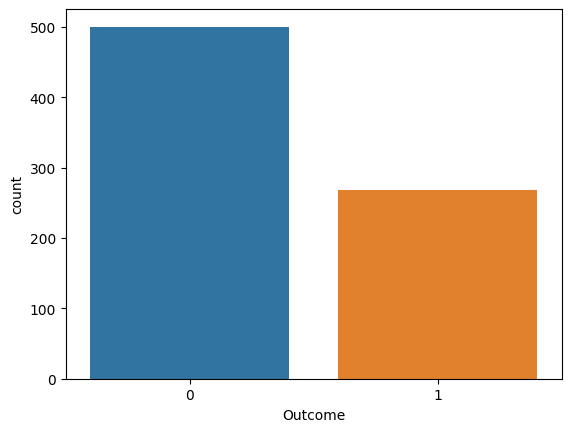

In [70]:

import seaborn as sns
sns.countplot(x='Outcome', data=diabetes)

In [38]:
# separating the data and labels (means dependent variable and indepandent variable)
x = diabetes.drop(columns= 'Outcome',axis=1)
y = diabetes['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [23]:
# data standardization(means arange the data in range form)
scaler = StandardScaler()
scaler.fit(x)
standardized= scaler.transform(x)
print(standardized)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [27]:
x = standardized
y = diabetes['Outcome']
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [36]:
# split the data by using train_test_spilt method of sklearn
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [40]:
# Training the Model by usin svm algo
# Here we aaply the supervised machine learning algo that is (support vector machine algo) 
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [42]:
# accuracy score on the training data 
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print("Accuracy score of training data ",training_data_accuracy)


Accuracy score of training data  0.7866449511400652


In [43]:
# accuracy score on the test data 
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy score of test data ",test_data_accuracy)

Accuracy score of test data  0.7727272727272727


In [74]:
input_data = (7,147,76,0,0,39.4,0.257,43)
# changing the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 

# standardized  the input data
std_data = scaler.transform(input_data_reshaped)
# print(std_data)

# prediction = classifier.predict(std_data)
# print(prediction)
# if (prediction[0]==0):
#     print("A person is not Diabetes")
# else:
#     print(" A person is Diabetes")

C:\Users\ASUSVivoBook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
prediction = classifier.predict(std_data)
# print(prediction)
if (prediction[0]==0):
    print("A person is not Diabetes")
else:
    print(" A person is Diabetes")

 A person is Diabetes
